# Importing Required Libraries

In [ ]:
# Libraries for Feature Engineering
import seaborn as sns

In [ ]:
# Libraries for Data Structures
import pandas as pd
import numpy as np

In [ ]:
# Libraries for Creating Pipelines
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [ ]:
# Libraries for Data Pre-processing and Processing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
# Libraries For Model Formation
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
# Libraries for Model Evaluation
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import accuracy_score, classification_report


# Dataset Customisation

In [ ]:
raw_data = pd.read_csv('/datasets/cancer.csv')
raw_data.shape

(569, 33)

##DataSet Columns Defination

```
1. id: Identification number.
2. diagnosis: Diagnosis of breast tissues (M = malignant, B = benign).
3. radius_mean: Mean of distances from the center to points on the perimeter.
4. texture_mean: Standard deviation of gray-scale values.
5. perimeter_mean: Mean size of the core tumor.
6. area_mean: Area of the tumor.
7. smoothness_mean: Mean of local variation in radius lengths.
8. compactness_mean: Mean of perimeter^2 / area - 1.0.
9. concavity_mean: Mean severity of concave portions of the contour.
10. concave_points_mean: Mean number of concave portions of the contour.
11. fractal_dimension_mean: Mean for "coastline approximation" - 1.
12. radius_se: Standard error for the mean of distances from the center to points on the perimeter.
13. texture_se: Standard error for standard deviation of gray-scale values.
14. smoothness_se: Standard error for local variation in radius lengths.
15. compactness_se: Standard error for perimeter^2 / area - 1.0.
16. concavity_se: Standard error for severity of concave portions of the contour.
17. concave_points_se: Standard error for the number of concave portions of the contour.
18. symmetry_se: Standard error for symmetry.
19. fractal_dimension_se: Standard error for "coastline approximation" - 1.
20. radius_worst: "Worst" or largest mean value for the mean of distances from the center to points on the perimeter.
21. texture_worst: "Worst" or largest mean value for standard deviation of gray-scale values.
22. smoothness_worst: "Worst" or largest mean value for local variation in radius lengths.
23. compactness_worst: "Worst" or largest mean value for perimeter^2 / area - 1.0.
24. concavity_worst: "Worst" or largest mean value for the severity of concave portions of the contour.
25. concave_points_worst: "Worst" or largest mean value for the number of concave portions of the contour.
26. fractal_dimension_worst: "Worst" or largest mean value for "coastline approximation" - 1.
27. gray-scale values: Gray-scale values.
28. perimeter_se: Standard error for the perimeter.
29. area_se: Standard error for the area.
30. symmetry_mean: Mean symmetry.
31. perimeter_worst: "Worst" or largest mean value for the perimeter.
32. area_worst: "Worst" or largest mean value for the area.
33. symmetry_worst: "Worst" or largest mean value for symmetry.
```



# Feature Engineering

## Feature Selection

<ipython-input-10-43c298583b53>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = raw_data.corr()


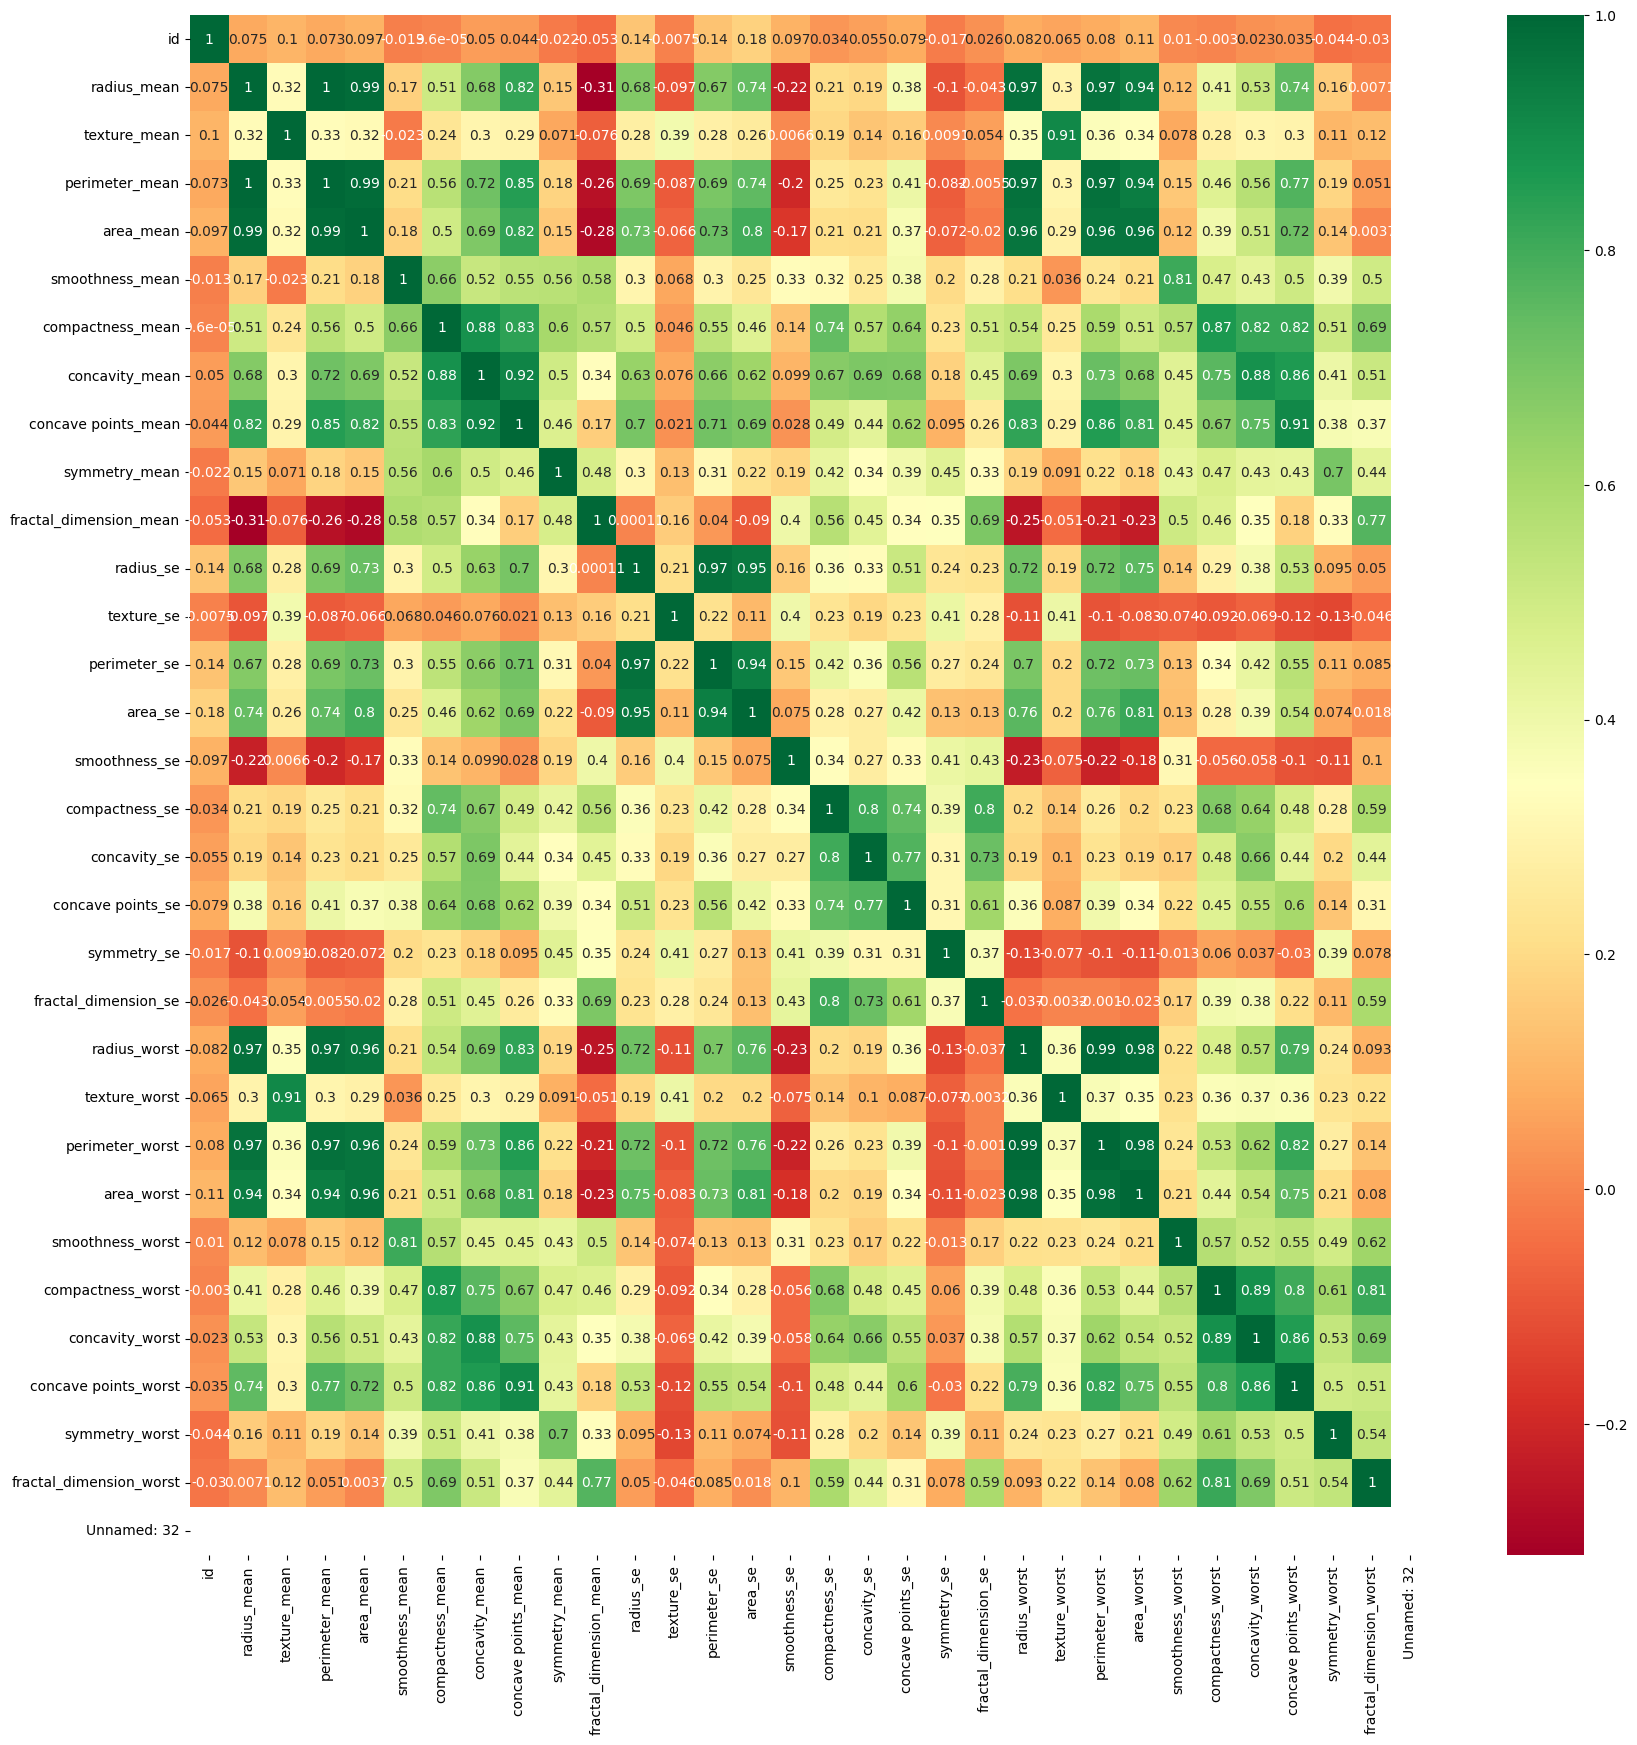

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = raw_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(raw_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

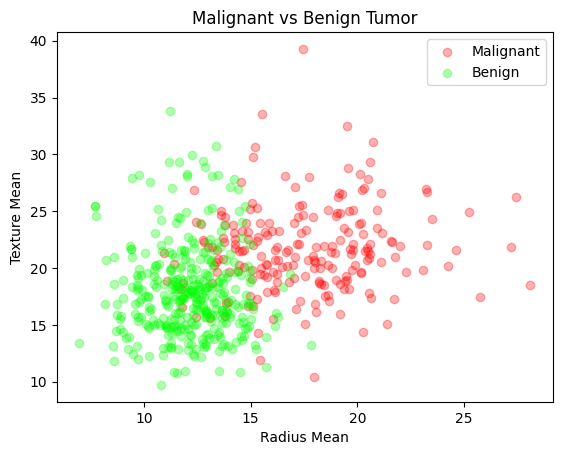

In [ ]:
M = raw_data[raw_data.diagnosis == "M"]
B = raw_data[raw_data.diagnosis == "B"]

plt.title("Malignant vs Benign Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "lime", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

## Dropping Non-Required Featues

In [ ]:
raw_data = raw_data.drop(["id"], axis = 1)
raw_data = raw_data.drop(["Unnamed: 32"], axis = 1)

## Converting Data Labels to Integer

In [ ]:
raw_data['diagnosis'] = pd.factorize(raw_data.diagnosis)[0]

1    357
0    212
Name: diagnosis, dtype: int64

# Data Pre-Processing and Processing

In [ ]:
# Separate labels and features
X = raw_data.drop(['diagnosis'], axis=1)
y = raw_data['diagnosis']


# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_scaled)

# Data Augmentation
smote = SMOTE(random_state=42)
X_imputed_smote, y_smote = smote.fit_resample(X_imputed, y)

# Now, split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_smote, y_smote, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import linear_model
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
# KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors=15)
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy=roc_auc_score(y_test, y_pred)*100
print(f'Accuracy : {accuracy}')


Accuracy : 97.1993732863298


In [ ]:
# Logistic Regression
logistic_regression = LogisticRegression(C = 0.2)
logistic_regression_model = logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression_model.predict(X_test)
accuracy=roc_auc_score(y_test, y_pred)*100
print(f'Accuracy : {accuracy}')

Accuracy : 98.5996866431649


In [ ]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy=roc_auc_score(y_test, y_pred)*100
print(f'Accuracy : {accuracy}')

Accuracy : 96.52369761065412


In [ ]:
# Random Forest Classifier
random_forest = RandomForestClassifier(max_depth=5, random_state=0).fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy=roc_auc_score(y_test, y_pred)*100
print(f'Accuracy : {accuracy}')

Accuracy : 97.1993732863298


In [ ]:
# Support Vector Machines
svc_model = SVC(gamma='auto').fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
accuracy=roc_auc_score(y_test, y_pred)*100
print(f'Accuracy : {accuracy}')

Accuracy : 98.5996866431649
